In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/submission/submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **House Price Prediction using Advanced Regression Techniques**
***Author:*** Ahmet Berke Karaca  
***Date:*** July 2025  
***Github:*** Ahmet Berke Karaca  




This study presents a comprehensive data analysis and machine learning project aimed at predicting house prices. The project is based on the "House Prices - Advanced Regression Techniques" competition dataset from Kaggle. This dataset includes a wide range of attributes related to residential home sales in encompassing various structural, locational, and physical characteristics.

The analysis process begins with loading the dataset and performing initial exploratory steps. In this phase, the distribution of the target variable, `SalePrice`, is examined to identify key statistical properties such as skewness and outliers. Subsequently, extensive data cleaning and preprocessing steps are applied, including handling missing values, managing outliers, deriving new features and transforming categorical variables.

To achieve robust and accurate predictions, a diverse set of regression algorithms were explored, including **Linear Regression, Lasso, Ridge, XGBoost, RandomForest, SVR, LightGBM (LGBM), and CatBoost**. The two top-performing models, **Ridge and CatBoost**, were then fine-tuned through hyperparameter optimization. Finally, to further enhance the model's robustness and predictive power, a **stacking regression** approach was implemented, combining the strengths of multiple models.

This notebook offers a structured approach to data manipulation, visualization, feature engineering, and advanced modeling techniques for those looking to gain practical experience in the fields of data science and machine learning.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings("ignore")

# 1 Loading the Dataset

In [52]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.shape

(1460, 81)

In [53]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.shape

(1459, 80)

In [54]:
# First five house sample from the dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
# Statistical properties of the columns
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2 Exploring the Target Variable

Let's begin by exploring our target variable to gain some initial insights. We'll start by visualizing its distribution using a histogram to understand its shape and identify any skewness or outliers. After that, we'll examine the correlation matrix to identify features that have strong relationships with the target variable, SalePrice, which could serve as potential predictors for our model.

## 2.1 Distribution of the Target Variable

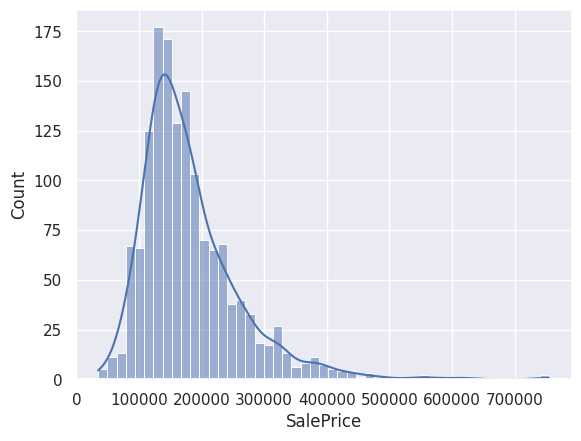

Skewness of the distribution: 1.88
Kurtosis of the distribution: 6.54


In [56]:
# Histogram for target variable
sns.histplot(
    data=train,
    x='SalePrice',
    kde=True
)
plt.show()
print(f"Skewness of the distribution: {train['SalePrice'].skew():.2f}")
print(f"Kurtosis of the distribution: {train['SalePrice'].kurt():.2f}")

In [57]:
# More info about SalePrice
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We see that the mean of sale price distribution is around 180k. The distribution is also skewed  with a value of 1.88. We will apply log transformation to normalize the target variable.

## 2.2 Feature correlation

We can also check the correlations of the numeric features with the target variable real quick to have some idea before the detailed analysis of variables.

<Figure size 1200x900 with 0 Axes>

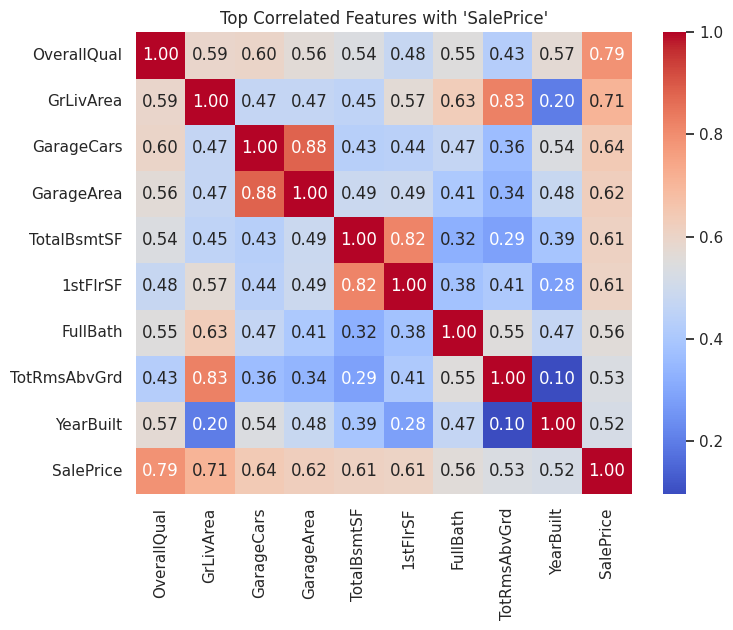

In [58]:
plt.figure(figsize=(12, 9))

# Compute correlation matrix for numeric features
corr_mat = train.corr(numeric_only=True)

# Get absolute correlations with SalePrice and sort them
top_corr = corr_mat['SalePrice'].abs().sort_values(ascending=False)

# Select the top 9 features most correlated with SalePrice (excluding SalePrice itself)
top_features = top_corr.index[1:10]

# Create a correlation matrix
heatmap_data = train[top_features.tolist() + ['SalePrice']].corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Top Correlated Features with '{'SalePrice'}'")
plt.show()

as we see in the last code cell's output, 'SalePrice' column is highly correlated with 'OverallQual', 'GrLivArea', 'GarageCars', and 'GarageArea'. These parameters are likely to be usefull for prediction. We can also see some multicollinearity among some variables, but we will deal with this problem later.

We can examine the features the highly correlated with target variable.

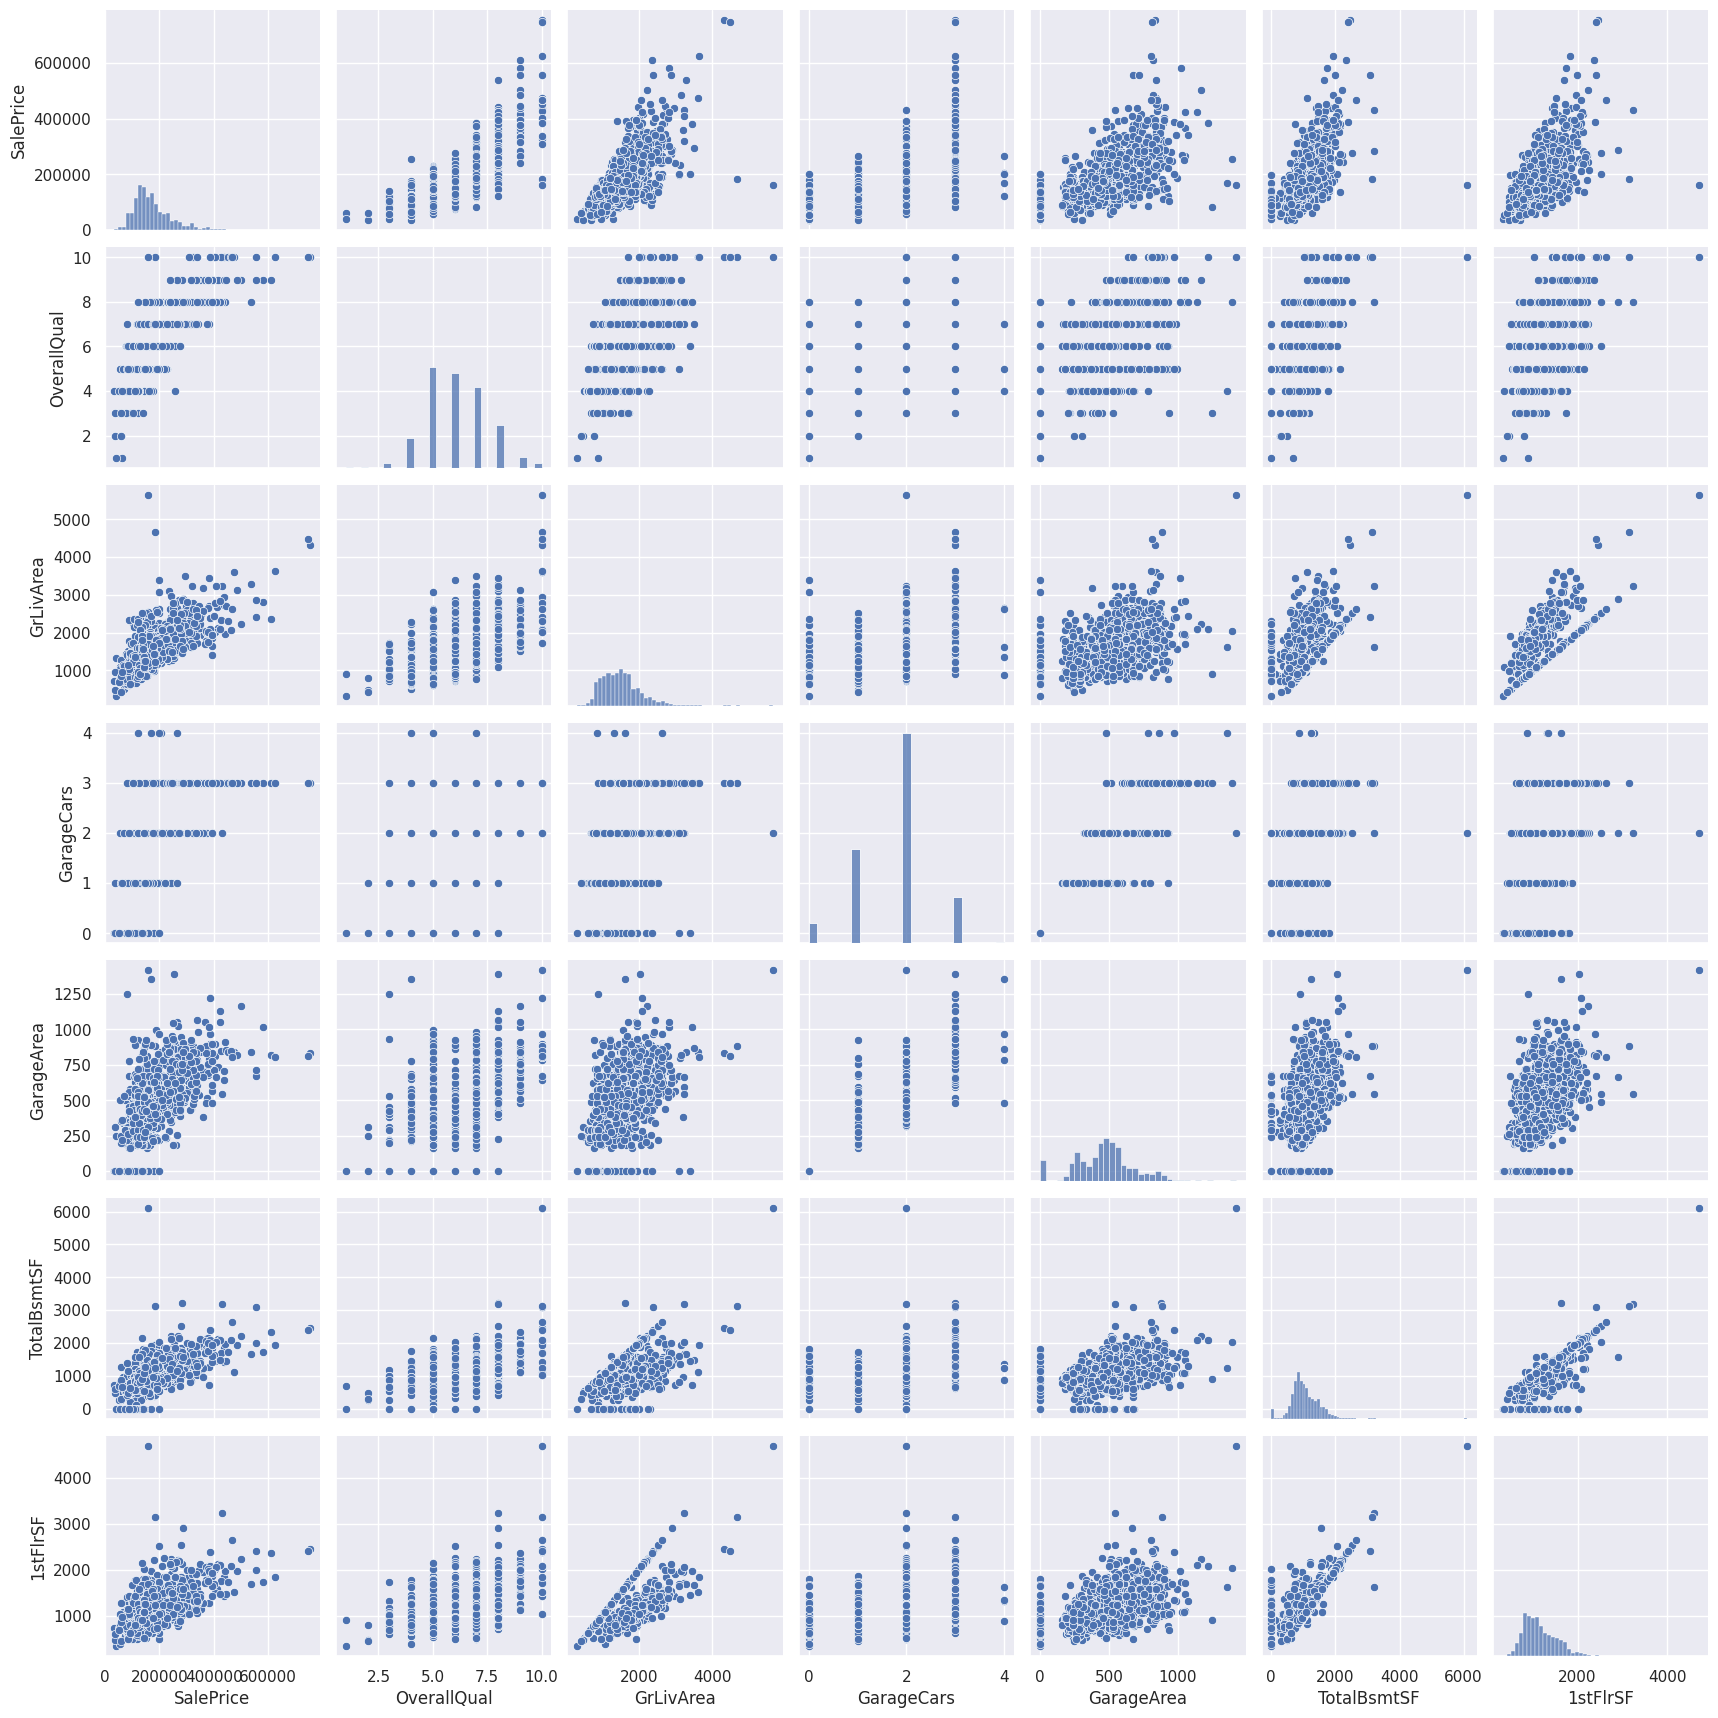

In [59]:
# Plot: Pairplot for the features the most correlated with the target variable
sns.set()
high_corr_target =['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(
    train[high_corr_target],
    size=2.5)
plt.show()

Now, we can explore the relationship between the target variable and the features that are highly correlated with it. 'SalePrice' shows a linear relationship with 'GrLivArea', although there is some heteroscedasticity present. A similar linear pattern can be observed with 'TotalBsmtSF'. Additionally, 'SalePrice' tends to increase as the number of 'GarageCars' and 'FullBath' rises, indicating a positive association. We also notice a correlation between 'GrLivArea' and 'TotalBsmtSF', which is one of the examples of multicollinearity seen in the correlation matrix.

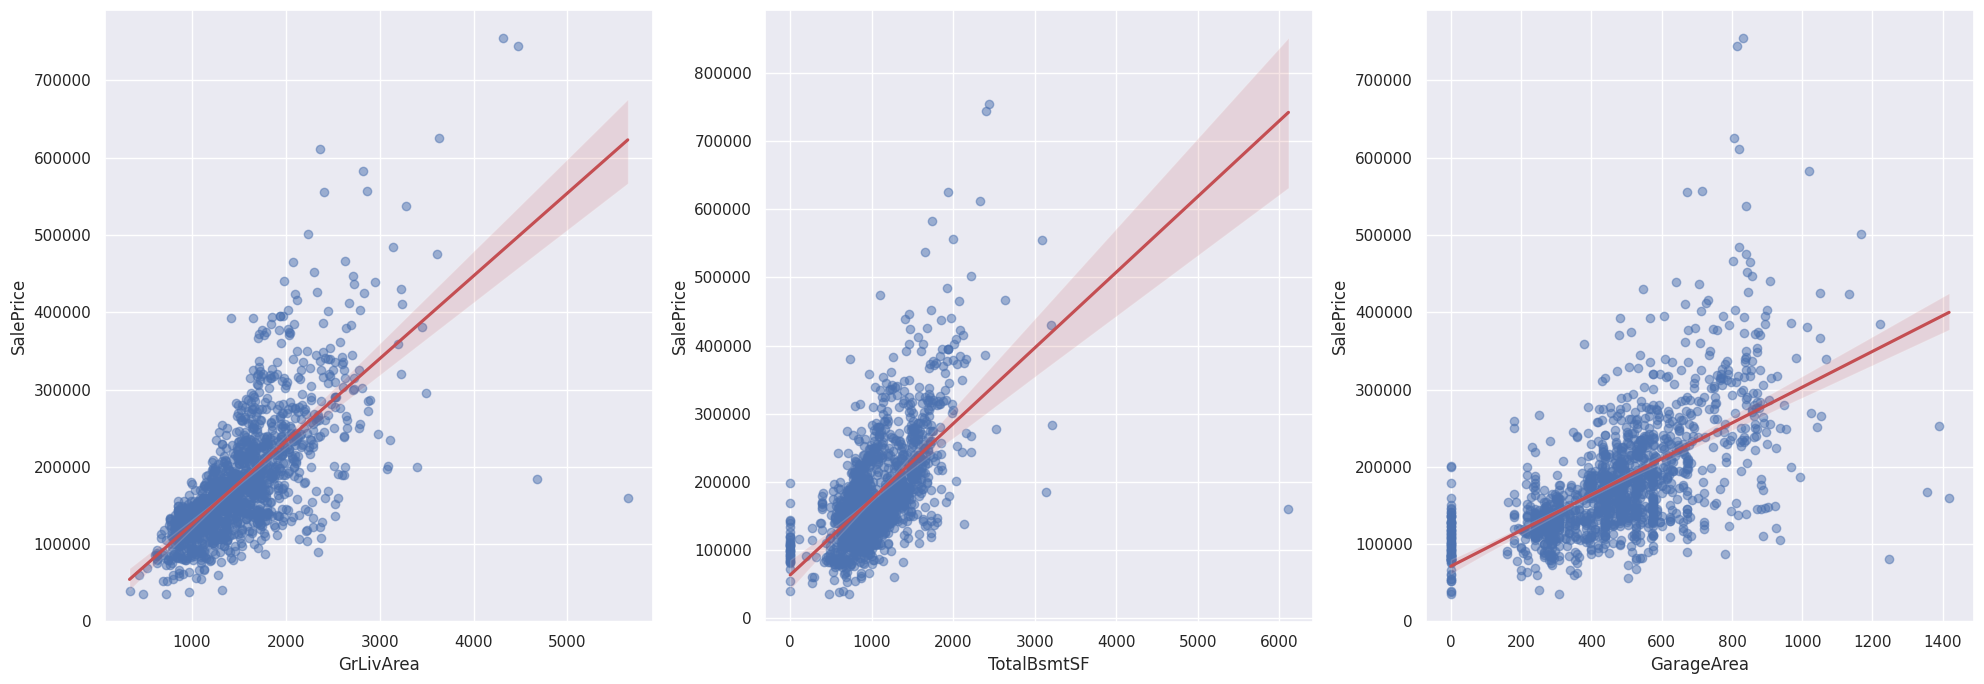

In [60]:
# Subplot (1 x 3) for linear regression model fit on the most correlated features
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
axs = axs.flatten()

# Plot1: GrLivArea vs SalePrice
sns.regplot(
    data=train,
    x='GrLivArea',
    y='SalePrice',
    ax=axs[0],
    line_kws=dict(color="r"),
    scatter_kws=dict(alpha=0.5)
)

# Plot2: TotalBsmtSF vs SalePrice
sns.regplot(
    data=train,
    x='TotalBsmtSF',
    y='SalePrice',
    ax=axs[1],
    line_kws=dict(color="r"),
    scatter_kws=dict(alpha=0.5)
)

# Plot3: GarageArea vs SalePrice
sns.regplot(
    data=train,
    x='GarageArea',
    y='SalePrice',
    ax=axs[2],
    line_kws=dict(color="r"),
    scatter_kws=dict(alpha=0.5)
)

plt.tight_layout()
plt.show()

The trend in SalePrice becomes clearer in this regplot visualization. All relationships exhibit heteroscedasticity, meaning their variance is not constant around the trend line. Additionally, the plots reveal the presence of outliers.

For instance, in the SalePrice–GrLivArea plot, there are two data points in the lower-right corner with unusually large GrLivArea values but unexpectedly low SalePrice, which clearly deviates from the overall trend. Similarly, in the SalePrice–TotalBsmtSF plot, one house has a basement size exceeding 6000 square feet, yet its sale price falls well outside the expected forecasting range. A comparable issue is observed in the final plot as well, where several data points diverge from the general pattern, indicating potential anomalies. We will handle this outliers in the following parts.

Now, let's visualize 'OverallQual', the feature most strongly correlated with the target variable 'SalePrice'. According to the data description, this feature is an ordinal categorical variable. Therefore, instead of a scatter plot, we'll use a boxplot to better capture the distribution of sale prices across different quality levels.

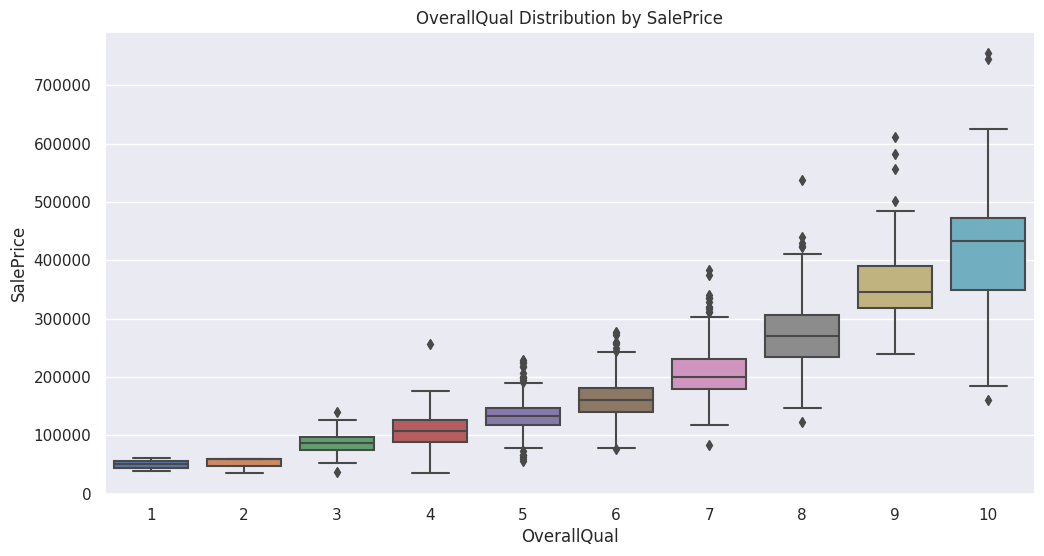

In [61]:
# Plot: SalePrice distribution across OverallQual levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='OverallQual', y='SalePrice')
plt.title("OverallQual Distribution by SalePrice")
plt.show()

We can clearly observe a strong trend between the overall quality of a house and its sale price. As the overall quality increases, the sale price rises as well. However, this relationship appears to be non-linear and accelerating, suggesting that improvements in quality have a disproportionately large impact on price at higher quality levels. Additionally, at higher quality levels, the price distribution becomes more dispersed.

To better capture the effect of higher quality values, it might be beneficial to create new features by taking the square or even the cube of the OverallQual variable.

# 3 Feature Analysis

Now, let's explore the characteristics of the features. First, we will identify the columns with missing values. Then, we will examine the properties of both categorical and numerical variables to decide on potential actions such as dropping columns, applying feature engineering, or making necessary adjustments.

## 3.1 Missing values

We will examine both the count and the percentage of missing values in the dataset.

In [62]:
# Identify columns with missing values
missing_columns = train.columns[train.isnull().any()]

print(f"Number of columns with missing values: {len(missing_columns)}")

# Create a DataFrame summarizing missing counts and ratios
df_missing = pd.DataFrame({
    'Missing Values': train[missing_columns].isna().sum(),
    'Missing Ratio': train[missing_columns].isna().sum() / train.shape[0]
})

# Sort by number of missing values descending and reset index
df_missing = df_missing.sort_values(by='Missing Values', ascending=False).reset_index()

df_missing

Number of columns with missing values: 19


,index,Missing Values,Missing Ratio
0,PoolQC,1453,0.995205
1,MiscFeature,1406,0.963014
2,Alley,1369,0.937671
3,Fence,1179,0.807534
4,MasVnrType,872,0.597260
5,FireplaceQu,690,0.472603
6,LotFrontage,259,0.177397
7,GarageType,81,0.055479
8,GarageYrBlt,81,0.055479
9,GarageFinish,81,0.055479


As we can see above, there are 19 columns with missing values. From '*data_description.txt*' file, we know that some of the columns are left blank/empty on purpose to indicate the categories like *None*, *Regular*, and etc. For example, *NA* in 'PoolQC' represents *No Pool* while it is *None* in 'MiscFeature'.

In [63]:
# The data sample with missing 'PoolQC' values
train[train['PoolQC'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


From the output of the previous code, it's evident that the rows with missing values in the 'PoolQC' column also have a value of 0 in the 'PoolArea' column — suggesting that there is no pool, and therefore, no quality rating. A similar pattern can be observed with 'MiscFeature': when there's no miscellaneous feature, the corresponding 'MiscVal' is also 0. However, we will drop the features with large proportion of missing values (>90%) because these columns will not store that much information.

In [64]:
columns_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']

Now, we can check other missing values apart from these features

In [65]:
missing_purpose = ['Alley',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType']

In [66]:
df_missing[~df_missing['index'].isin(missing_purpose)]

,index,Missing Values,Missing Ratio
6,LotFrontage,259,0.177397
8,GarageYrBlt,81,0.055479
17,MasVnrArea,8,0.005479
18,Electrical,1,0.000685


we are end with only four columns that have missing values, which will be much more easy to impute. 

Now, let's breakdown the features ans numeric and categoric and investigate them a bit more in detail.

In [67]:
# Splitting the features in different lists
categorical_features = list(train.select_dtypes('object'))
numeric_features = [feature for feature in list(train) if feature not in categorical_features]

print(f"Number of categorical features: {len(categorical_features)}")
print(f"Number of numerical features: {len(numeric_features)}")

Number of categorical features: 43
Number of numerical features: 38


## 3.2 Categorical variables

We will leverage Plotly’s dropdown feature to interactively visualize our categorical variables and explore their distributions. This will help us assess whether the category distributions are reasonable, identify any high-cardinality features, and determine if some columns should be converted to numeric types due to their ordinal nature.

In [68]:
import pandas as pd
import plotly.graph_objects as go

# Precompute percentage bars for each column
bar_data = {}
for col in categorical_features:
    value_counts = train[col].value_counts(normalize=True) * 100  # Normalize to get percentages
    bar_data[col] = go.Bar(x=value_counts.index, y=value_counts.values, name=col,
                           text=[f"{val:.1f}%" for val in value_counts.values],
                           textposition='auto')

# Initial figure with first column
fig = go.Figure(data=[bar_data[categorical_features[0]]])

# Add dropdown for selecting columns
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': col,
                'method': 'update',
                'args': [
                    {
                        'x': [train[col].value_counts(normalize=True).index],
                        'y': [train[col].value_counts(normalize=True).values * 100],
                        'text': [[f"{v:.1f}%" for v in train[col].value_counts(normalize=True).values]],
                        'type': 'bar'
                    },
                    {'title.text': f"""
                        Category Name: {col}
                        Number of Missing Values: {train[col].isna().sum()} ({round(train[col].isna().sum()/train.shape[0]*100, 2)} %)"""}
                ]
            } for col in categorical_features
        ],
        'direction': 'down',
        'showactive': True,
    }],
    title=f"""
        Category Name: MSZoning
        Number of Missing Values: {train['MSZoning'].isna().sum()} ({round(train['MSZoning'].isna().sum()/train.shape[0]*100, 2)} %)
    """,
    xaxis_title='Category',
    yaxis_title='Percentage (%)',
    yaxis_range=[0, 100]
)

fig.show()


After examining the categorical variables, we concluded that many columns—such as 'LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', and 'PavedDrive'—require ordinal encoding due to their inherent order.

Additionally, some columns—namely 'Street', 'Utilities', 'Condition2', 'RoofMatl', and 'Heating'—contain little useful information as their values are heavily concentrated in a single category, so we will drop them. Finally, no categorical variables with high cardinality were observed.

In [69]:
categories2ordinal = ['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                      'GarageCond', 'PavedDrive']
nominal_features = list(set(categorical_features) - set(categories2ordinal))

In [70]:
columns_drop = columns_drop + ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']

## 3.3 Numerical Features

Next, we will examine the numerical columns by visualizing all numeric features using histograms to explore their distributions and key characteristics.

In [71]:
# Printing Numeric Features
print(numeric_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


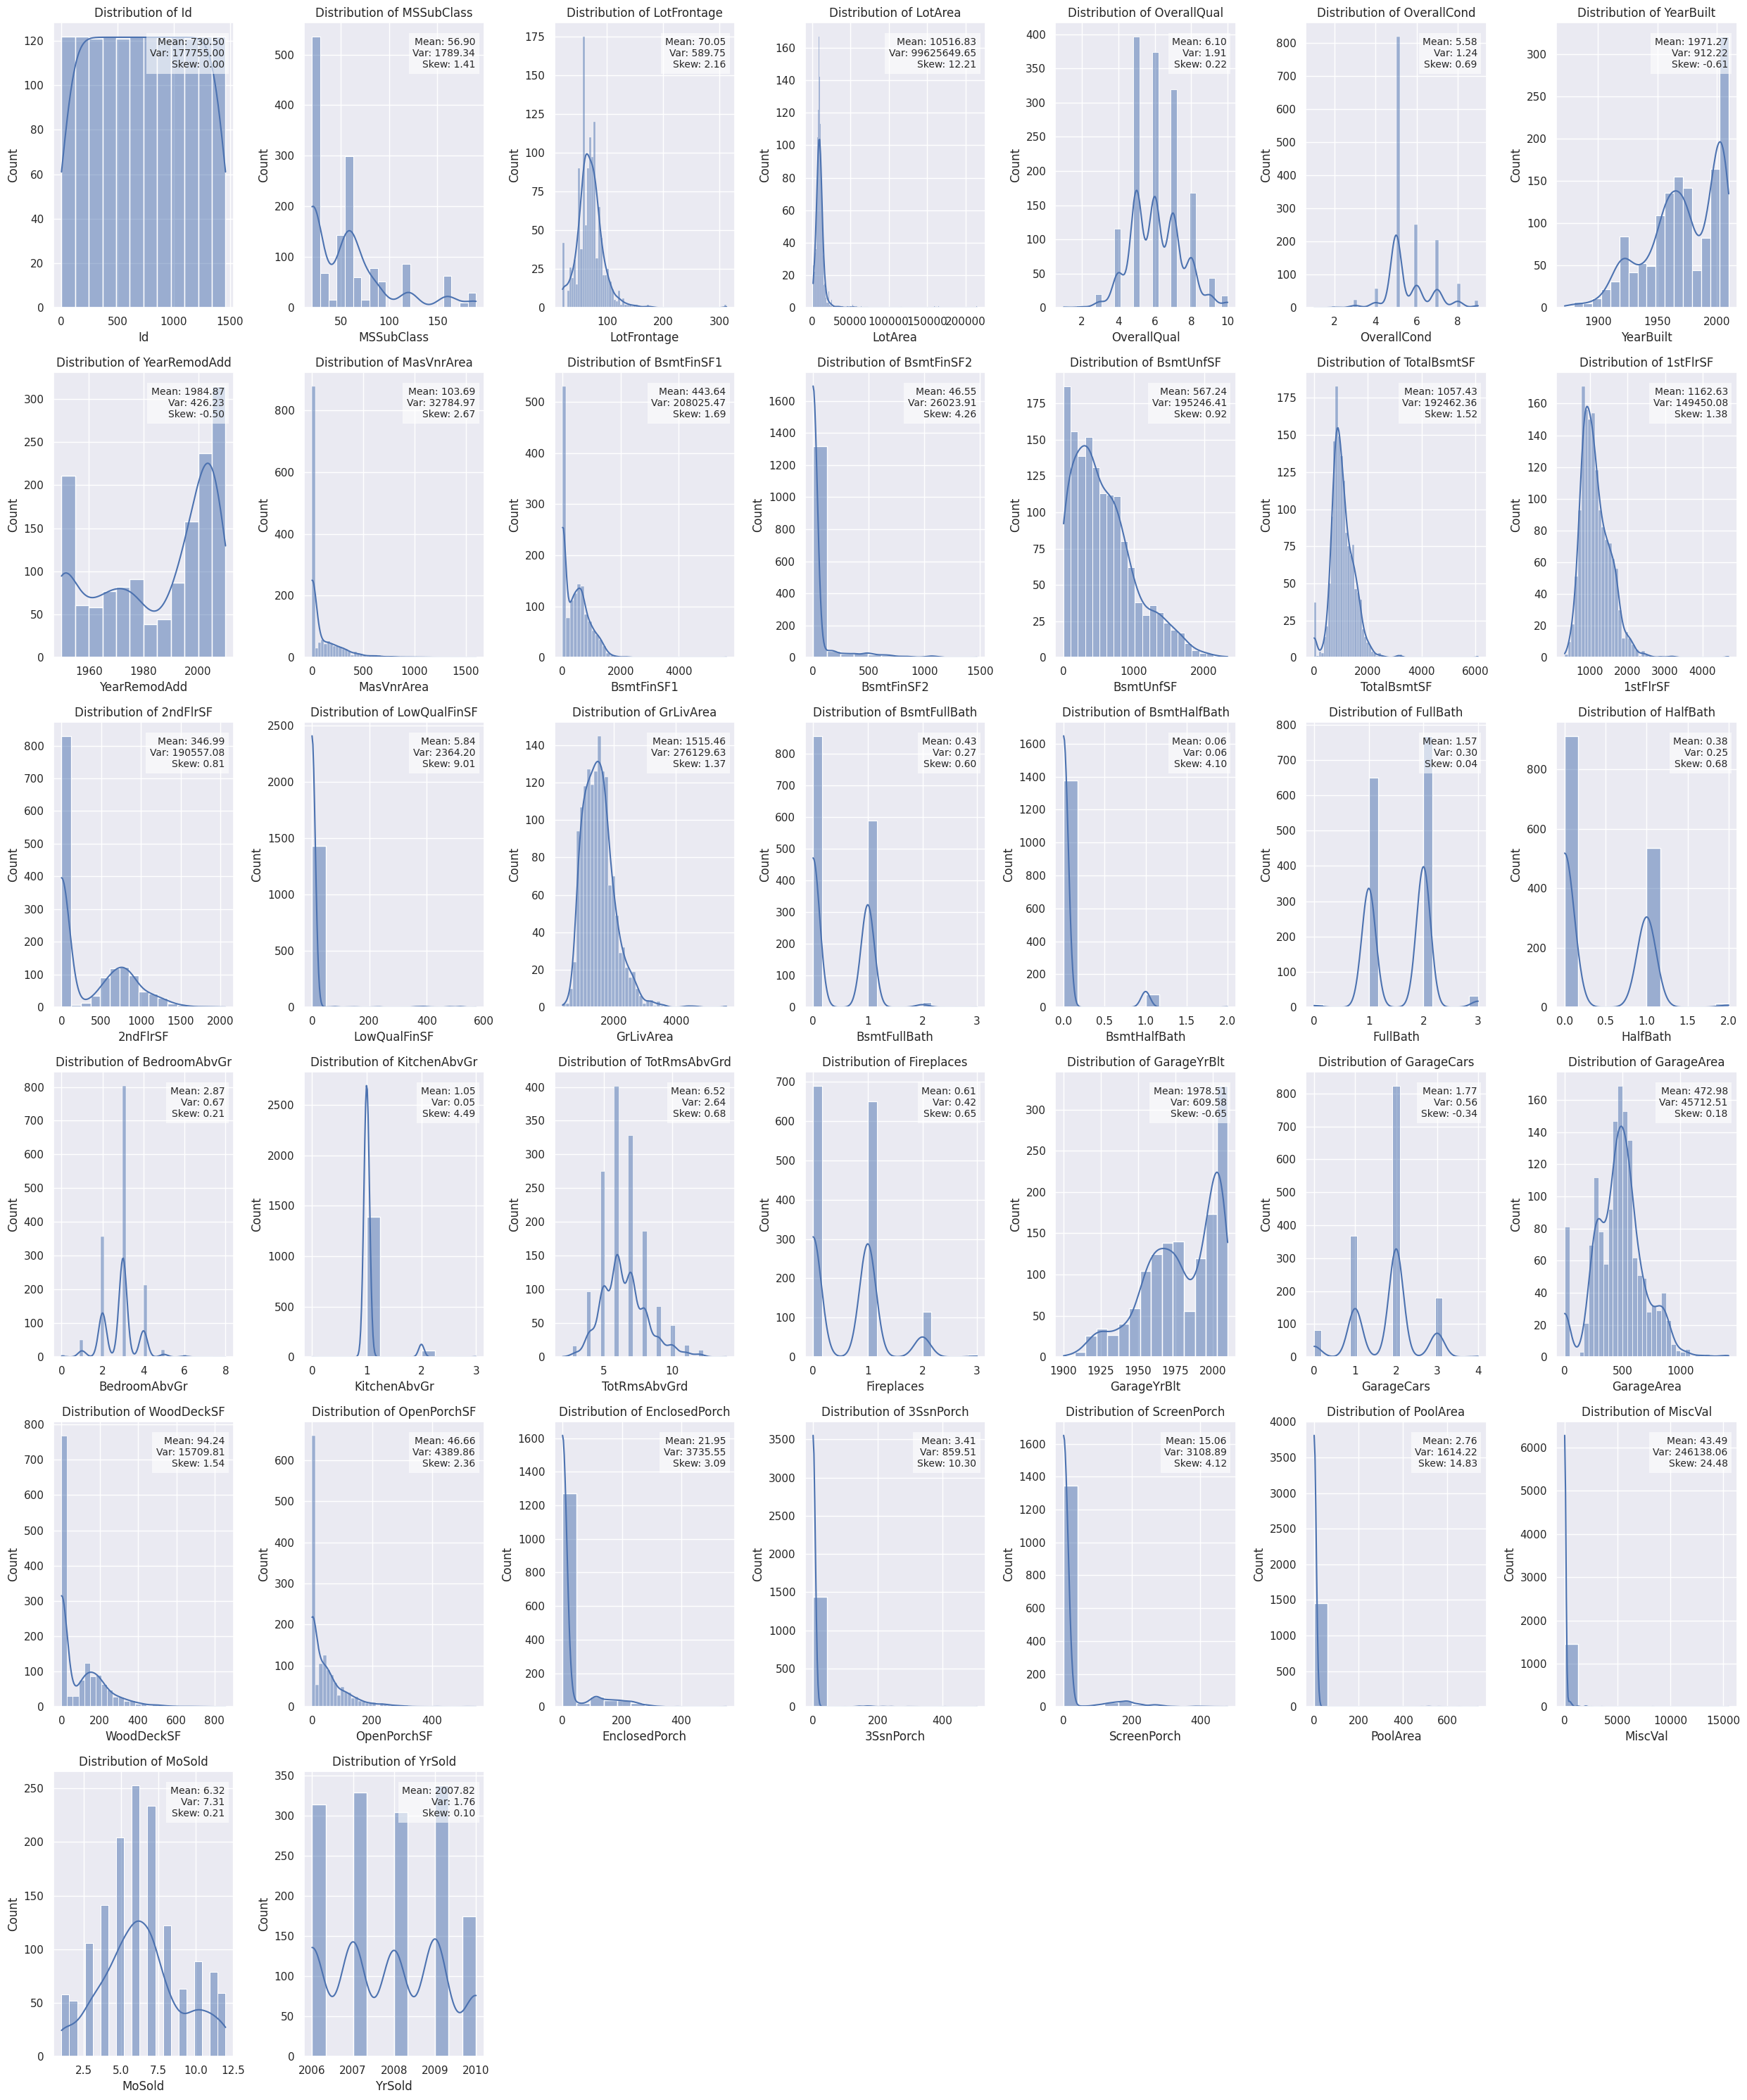

In [72]:
# Subplot (6 x 7) for numeric feature distributions
fig, axes = plt.subplots(6, 7, figsize=(25, 30))
axes = axes.flatten()  

cols = numeric_features[:37]  # Visualize the first 37 numeric features (excluding SalePrice)

for i, col in enumerate(cols):
    # Plot histogram with KDE for each numeric feature
    sns.histplot(data=train, x=col, ax=axes[i], kde=True)
    
    # Calculate statistics for annotation
    mean_val = train[col].mean()
    var_val = train[col].var()
    skew_val = train[col].skew()
    
    # Add stats as text inside each subplot
    axes[i].text(0.95, 0.95, f"Mean: {mean_val:.2f}\nVar: {var_val:.2f}\nSkew: {skew_val:.2f}",
                 horizontalalignment='right',
                 verticalalignment='top',
                 transform=axes[i].transAxes,
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
    
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

First, we identified a few numerical features—'MoSold', 'YrSold', and 'MSSubClass'—that should be treated as categorical variables rather than continuous. Next, we can classify some features as discrete numeric variables, such as 'Id', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', and 'GarageCars'. Additionally, 'OverallQual' and 'OverallCond' should be considered ordinal features due to their inherent ranking structure.

The remaining numeric features can be treated as continuous. Upon examining their distributions, we observe that many of them are highly skewed. To address this, we will apply logarithmic transformations to help normalize these distributions and improve model performance.

In [73]:
numeric2category = ['MoSold', 'YrSold', 'MSSubClass']
discrete_features = ['Id', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']
ordinal_features = ['OverallQual', 'OverallCond']
continuous_features = list(set(numeric_features) - set(ordinal_features) - set(discrete_features) - set(numeric2category) - set(['SalePrice']))

## 4 Feature Engineering

After analyzing the categories and their structures, in this section we will explore the correlations between features and investigate potential feature engineering opportunities within the dataset. Following that, we will address outlier management.

Let's observe the correlation matrix of the whole dataset.

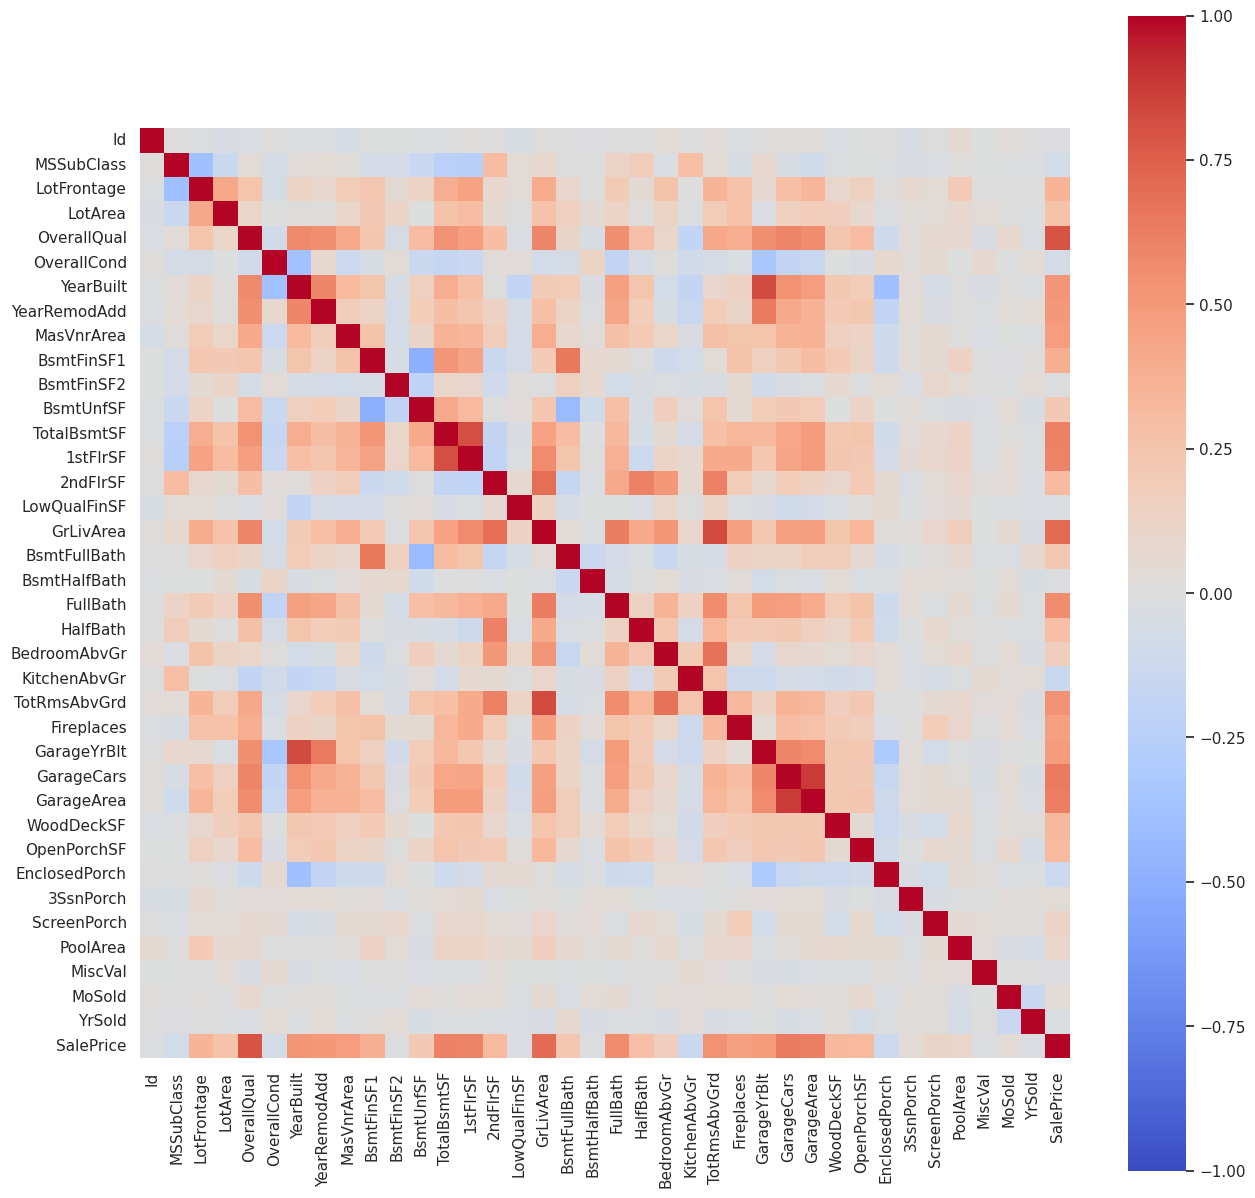

In [74]:
plt.figure(figsize=(15, 15))

# Calculate correlation matrix for numerical features
corr_mat = train.corr(numeric_only=True)

# Plot: heatmap of the correlation matrix
sns.heatmap(
    corr_mat,
    vmin=-1,        
    vmax=1,           
    center=0,         
    square=True,      
    cmap='coolwarm'   
)

plt.show()

With this version of the correlation matrix, the relationships are much clearer. Our strategy moving forward is to identify pairs of features that exhibit a correlation above a specified threshold. Subsequently, for each of these highly correlated pairs, we'll compare their individual correlation with our target variable. The goal is to remove the feature that has a weaker relationship with the target, thereby optimizing our dataset.

## 4.1 Deriving New Features

In [75]:
# Copying the train dataset for feature engineering, we will use this new df as a dummy dataset
feature_eng = train.copy()

In [76]:
# Deriving some new features from the existing ones
feature_eng['OverallQual^2'] = feature_eng['OverallQual']**2
feature_eng['BuildAge'] = feature_eng['YrSold'] - feature_eng['YearBuilt'] 
feature_eng['TotalSF'] = feature_eng['TotalBsmtSF'] + feature_eng['GrLivArea'] + feature_eng['GarageArea']
feature_eng['TotalBath'] = feature_eng['FullBath'] + 0.5 * feature_eng['HalfBath']
feature_eng['RemodAge'] = feature_eng['YrSold'] - feature_eng['YearRemodAdd']
feature_eng['HasGarage'] = (feature_eng['GarageArea'] > 0).astype(int)
feature_eng['HasFireplace'] = (feature_eng['Fireplaces'] > 0).astype(int)
feature_eng['HasBsmt'] = (feature_eng['TotalBsmtSF'] > 0).astype(int)
feature_eng['QuarterSold'] = ((feature_eng['MoSold'] - 1) // 3) + 1
feature_eng['TotalPorchSF'] = feature_eng['OpenPorchSF'] +feature_eng['EnclosedPorch'] +feature_eng['3SsnPorch'] +feature_eng['ScreenPorch']

In [77]:
# Listing the new features
new_features = [
    'OverallQual^2', 'BuildAge', 'TotalSF', 'TotalBath',
    'RemodAge', 'HasGarage','HasFireplace', 'QuarterSold', 'TotalPorchSF', 'HasBsmt'
]

# Correlation of the new features with the target variable
correlations = feature_eng[new_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

print(correlations)

SalePrice        1.000000
OverallQual^2    0.817168
TotalSF          0.807518
TotalBath        0.597966
HasFireplace     0.471908
HasGarage        0.236832
TotalPorchSF     0.195739
HasBsmt          0.152829
QuarterSold      0.043194
RemodAge        -0.509079
BuildAge        -0.523350
Name: SalePrice, dtype: float64


It seems we have derived some strong features, especially ‘OverallQual²’ and ‘TotalSF’. Additionally, there are some features with relatively negative correlations, such as ‘RemodAge’ and ‘BuildAge’. We can include these in our dataset, but first, we will check for any existing multicollinearity.

Since our new features are created through basic mathematical operations, it is likely that multicollinearity exists between them and the original features they were derived from. We will identify features with high correlation among themselves and then consider dropping those that have low correlation with the target variable.

In [78]:
# Remove the target column 'SalePrice' to focus only on features
no_target = feature_eng.drop(columns='SalePrice')

# Calculate the correlation matrix for numerical features
corr_matrix = no_target.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix, excluding the diagonal
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.8

print(f"Features above ({threshold}) correlation:")
found_pairs = []

# Loop through the upper triangle matrix to find pairs with correlation above the threshold
for i in range(len(upper_tri.columns)):
    for j in range(i + 1, len(upper_tri.columns)):  # j should be greater than i
        feature1 = upper_tri.columns[i]
        feature2 = upper_tri.columns[j]
        correlation_value = upper_tri.iloc[i, j]

        # Check if absolute correlation exceeds the threshold
        if abs(correlation_value) >= threshold:
            found_pairs.append((feature1, feature2, correlation_value))

# If any highly correlated pairs are found, print them sorted by correlation value
if found_pairs:
    found_pairs.sort(key=lambda x: x[2], reverse=True)
    for feat1, feat2, corr_val in found_pairs:
        print(f"  - '{feat1}' and '{feat2}': Correlation = {corr_val:.4f}")
        print(f"Target Correlations: {round(feature_eng[feat1].corr(feature_eng['SalePrice']),4)}, {round(feature_eng[feat2].corr(feature_eng['SalePrice']),4)}")
        print("*"*40)
else:
    print("No multicollinearity above 0.8")

Features above (0.8) correlation:
  - 'OverallQual' and 'OverallQual^2': Correlation = 0.9877
Target Correlations: 0.791, 0.8172
****************************************
  - 'MoSold' and 'QuarterSold': Correlation = 0.9545
Target Correlations: 0.0464, 0.0432
****************************************
  - 'FullBath' and 'TotalBath': Correlation = 0.9201
Target Correlations: 0.5607, 0.598
****************************************
  - 'Fireplaces' and 'HasFireplace': Correlation = 0.9005
Target Correlations: 0.4669, 0.4719
****************************************
  - 'GarageCars' and 'GarageArea': Correlation = 0.8825
Target Correlations: 0.6404, 0.6234
****************************************
  - 'GrLivArea' and 'TotalSF': Correlation = 0.8601
Target Correlations: 0.7086, 0.8075
****************************************
  - 'YearBuilt' and 'GarageYrBlt': Correlation = 0.8257
Target Correlations: 0.5229, 0.4864
****************************************
  - 'GrLivArea' and 'TotRmsAbvGrd': Corre

Based on the results above, we identified 13 instances of multicollinearity. Deciding which features to drop ultimately depends on specific preferences. In this notebook, we will remove only those features that have a very high correlation with their paired feature but very low correlation with the target variable. Accordingly, ‘YearBuilt’, ‘YearRemodAdd’, ‘GarageYrBlt’, ‘TotRmsAbvGrd’, ‘MoSold’, and ‘OverallQual’ will be dropped. It’s important to keep in mind that such decisions often require an experimental approach and further validation.

In [79]:
columns_drop = columns_drop + ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'MoSold', 'OverallQual']                              

Now, let's visualise the top 10 most correlated features with our target variable

<Figure size 1200x900 with 0 Axes>

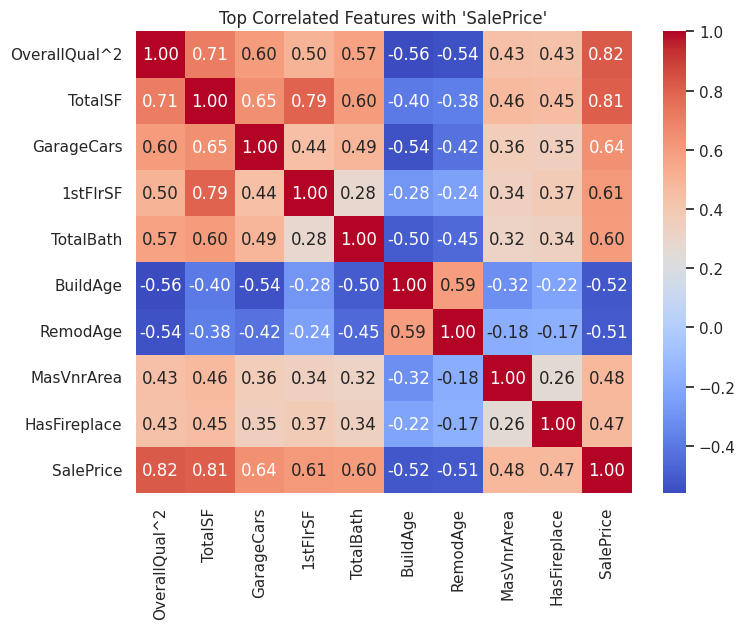

In [80]:
plt.figure(figsize=(12, 9))

# Calculate correlation matrix after dropping specified features
corr_mat = feature_eng.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea','GarageArea', 'Fireplaces', 'FullBath',
                               'MoSold', 'OverallQual']).corr(numeric_only=True)

# Get absolute correlations with 'SalePrice' and sort descending
top_corr = corr_mat['SalePrice'].abs().sort_values(ascending=False)

# Select top 9 features excluding 'SalePrice' itself
top_features = top_corr.index[1:10]

# Prepare correlation matrix for the top features and the target
heatmap_data = feature_eng[top_features.tolist() + ['SalePrice']].corr()

# Plot heatmap of correlations among top features and SalePrice
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Top Correlated Features with '{'SalePrice'}'")
plt.show()


## 4.2 Outliers

Now we will check for potential outliers. To do this, we will use dropdown feature of pyplot again.

In [81]:
import pandas as pd
import plotly.graph_objects as go

box_traces = []
titles = []
visibility = []

# Create a boxplot trace for each numeric feature
for i, col in enumerate(numeric_features):
    col_data = train[col].dropna()

    # Calculate outliers using the IQR method
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((col_data < lower) | (col_data > upper)).sum()

    # Calculate missing value counts and percentage
    missing = train[col].isna().sum()
    missing_pct = round(missing / train.shape[0] * 100, 2)

    # Create a boxplot trace, only the first one is visible by default
    trace = go.Box(
        y=col_data,
        name=col,
        visible=True if i == 0 else False,
        boxpoints='outliers',
        marker_color='steelblue'
    )
    box_traces.append(trace)

    # Prepare title with feature name, missing data, and outlier count
    title_text = f"Feature: {col} | Missing: {missing} ({missing_pct}%) | Outliers: {outlier_count}"
    titles.append(title_text)

# Create dropdown buttons to toggle between features
buttons = []
for i, col in enumerate(numeric_features):
    vis = [False] * len(numeric_features)
    vis[i] = True  # Only show the selected feature's boxplot
    buttons.append(
        dict(
            label=col,
            method="update",
            args=[
                {"visible": vis},
                {
                    "title.text": titles[i],
                    "xaxis.title.text": col,
                }
            ]
        )
    )

# Build the figure with all traces and dropdown menu
fig = go.Figure(data=box_traces)

fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 0,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title={
        "text": titles[0],
        "x": 0.5,
        "xanchor": "center"
    },
    xaxis_title=numeric_features[0],
    yaxis_title="Value",
    height=950,
    width=800
)

fig.show()

Handling outliers can be challenging, especially with small datasets like ours. As seen in the boxplots, there are many outliers present. Therefore, directly removing or winsorizing them without domain knowledge might not be a good approach. What appears to be an outlier could actually carry valuable information about the feature—for example, a luxury house type. For this reason, we will not remove all outliers in this notebook.

Based on insights from some Kaggle notebooks (considered as domain knowledge), houses with GrLivArea greater than 4000 or 6000 square feet are often treated as outliers. Accordingly, we will drop these houses from the training set during preprocessing.

# 5 Data Preprocessing

Now we are ready to build our preprocessing pipelines, implementing the decisions we made during EDA.

The process consists of 10 main steps:

1. Drop the outliers

2. Derive new features

3. Drop unnecessary columns

4. Apply log transformation

5. Impute default missing values (intentionally left blank)

6. Impute and encode nominal features

7. Impute, encode, and scale ordinal categorical features

8. Impute and scale ordinal numeric features

9. Impute and scale discrete features

10. Impute, log-transform, and scale continuous features

Finally, we will combine these steps into a unified preprocessing pipeline applied in the correct sequence.

In [82]:
# Update feature lists by removing dropped columns and adding new engineered features
categories2ordinal = list(set(categories2ordinal) - set(columns_drop))
nominal_features = list(set(nominal_features + numeric2category) - set(columns_drop)) + ['QuarterSold']
discrete_features = list(set(discrete_features) - set(columns_drop)) + ['TotalBath', 'HasGarage', 'HasFireplace', 'HasBsmt']
ordinal_features = list(set(ordinal_features) - set(columns_drop)) + ['OverallQual^2']
continuous_features = list(set(continuous_features) - set(columns_drop)) + ['BuildAge', 'TotalSF', 'RemodAge', 'TotalPorchSF']

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [84]:
### PREPROCESS-STEP1: DROP THE OUTLIERS

def outlierDropper(X,y):
    mask = (X['GrLivArea'] < 4000) & (X['TotalBsmtSF'] < 6000)
    return X[mask], y[mask]

In [85]:
### PREPROCESS-STEP2: DERIVE NEW FEATURES

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  

        X['OverallQual^2'] = X['OverallQual'] ** 2
        X['BuildAge'] = X['YrSold'] - X['YearBuilt']
        X['TotalSF'] = X['TotalBsmtSF'] + X['GrLivArea'] + X['GarageArea']
        X['TotalBath'] = X['FullBath'] + 0.5 * X['HalfBath']
        X['RemodAge'] = X['YrSold'] - X['YearRemodAdd']
        X['HasGarage'] = (X['GarageArea'] > 0).astype(int)
        X['HasFireplace'] = (X['Fireplaces'] > 0).astype(int)
        X['HasBsmt'] = (X['TotalBsmtSF'] > 0).astype(int)
        X['QuarterSold'] = ((X['MoSold'] - 1) // 3) + 1
        X['TotalPorchSF'] = (
            X['OpenPorchSF'] +
            X['EnclosedPorch'] +
            X['3SsnPorch'] +
            X['ScreenPorch']
        )

        return X

In [86]:
### PREPROCESS-STEP3: DROP THE UNNECESSARY COLUMNS

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_drop):
        self.columns_drop = columns_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop determined unnecessary columns
        return X.drop(self.columns_drop, axis=1)


In [87]:
### PREPROCESS-STEP4: APPLY LOG TRANSOFORMATION

class LogTransformer(BaseEstimator, TransformerMixin):
    # Custom transformer to apply log1p transform to specified columns based on skewness

    def __init__(self, columns, skewness_threshold=0.5):
        self.columns = columns
        self.skewness_threshold = skewness_threshold
        self.columns_to_transform_ = []

    def fit(self, X, y=None):
        # Determine which columns need transformation by checking skewness
        if not isinstance(X, pd.DataFrame):
            try:
                X_df = pd.DataFrame(X, columns=self.columns)
            except ValueError:
                print("Warning: Input shape mismatch during fit.")
                X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()

        self.columns_to_transform_ = []

        for col in self.columns:
            if col in X_df.columns and pd.api.types.is_numeric_dtype(X_df[col]):
                if X_df[col].skew() >= self.skewness_threshold:
                    self.columns_to_transform_.append(col)

        return self

    def transform(self, X):
        # Apply log1p transform only to selected columns
        if not isinstance(X, pd.DataFrame):
            try:
                X_transformed = pd.DataFrame(X, columns=self.columns if len(self.columns) == X.shape[1] else None)
                if X_transformed.columns.empty and self.columns:
                    if len(self.columns) == X.shape[1]:
                        X_transformed.columns = self.columns
                    else:
                        print("Warning: Input shape mismatch during transform.")
            except ValueError:
                print("Warning: Input shape mismatch during transform, returning original data.")
                return X.copy()
        else:
            X_transformed = X.copy()

        for col in self.columns_to_transform_:
            # Replace negative values with zero and add a small epsilon before log transform
            X_transformed[col] = X_transformed[col].apply(lambda x: max(0, x)) + 1e-9
            X_transformed[col] = np.log1p(X_transformed[col])

        return X_transformed

In [88]:
### PREPROCESS-STEP5: IMPUTING THE DEFAULT VALUES

# Dictionary specifying default fill values for certain categorical features with missing data
default_fill_values = {
    'GarageType': 'No',
    'GarageFinish': 'No',
    'GarageQual': 'No',
    'GarageCond': 'No',
    'BsmtQual': 'No',
    'BsmtCond': 'No',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No',
    'BsmtFinType2': 'No',
    'FireplaceQu': 'No',
    'MasVnrType': 'None',
    'Functional': 'Typ'
}

class DefaultFillImputer(BaseEstimator, TransformerMixin):
    # Custom transformer to fill missing values in specified columns with given default values
    def __init__(self, fill_values):
        self.fill_values = fill_values
    
    def fit(self, X, y=None):
        # No fitting needed, just return self
        return self
    
    def transform(self, X):
        # Fill missing values in columns according to the fill_values dictionary
        X = X.copy()
        for col, val in self.fill_values.items():
            if col in X.columns:
                X[col] = X[col].fillna(val)
        return X

In [89]:
### PREPROCESS-STEP6: NOMINAL PIPELINE

# Create a preprocessing pipeline for nominal features:
# 1. Impute missing values with the most frequent method
# 2. Encode categories
nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [90]:
### PREPROCESS-STEP7: CATEGORY TO ORDINAL PIPELINE

# Define the order of categories for ordinal encoding, representing quality and condition levels
qual_cond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']  # Poor to Excellent
fin_type = ['No', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']  # Basement finish types

# Mapping categorical features to their respective ordinal category order
category2ordinal_orders = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandContour': ['Low', 'HLS', 'Bnk', 'Lvl'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': qual_cond,
    'ExterCond': qual_cond,
    'BsmtQual': ['No'] + qual_cond,
    'BsmtCond': ['No'] + qual_cond,
    'BsmtExposure': ['No Basement', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': fin_type,
    'BsmtFinType2': fin_type,
    'HeatingQC': qual_cond,
    'KitchenQual': qual_cond,
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['No'] + qual_cond,
    'GarageFinish': ['No', 'Unf', 'Rfn', 'Fin'],
    'GarageQual': ['No'] + qual_cond,
    'GarageCond': ['No'] + qual_cond,
    'PavedDrive': ['N', 'P', 'Y']
}

# Extract only the category order lists for the encoder
category2ordinal_order = list(category2ordinal_orders.values())

# Create a preprocessing pipeline for ordinal categorical features:
# 1. Impute missing values with the most frequent method
# 2. Encode categories
# 3. Scale the encoded values using StandardScaler
category2ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=category2ordinal_order, handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler())
])


In [91]:
### PREPROCESS-STEP8: ORDINAL PIPELINE

# Create a preprocessing pipeline for ordinal features:
# 1. Impute missing values with the most frequent method
# 2. Scale the values using StandardScaler
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

In [92]:
### PREPROCESS-STEP9: DISCRETE PIPELINE

# Create a preprocessing pipeline for discrete features:
# 1. Impute missing values with the most frequent method
# 2. Scale the values using StandardScaler
discrete_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

In [93]:
### PREPROCESS-STEP10: CONTINOUS PIPELINE
from sklearn.feature_selection import VarianceThreshold

# Create a preprocessing pipeline for discrete features:
# 1. Impute missing values with the median method
# 2. Apply log transformation
# 3. Feature selection with variance
# 4. Scale the values using StandardScaler
continuous_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', LogTransformer(columns=continuous_features)),
    ('var_thresh', VarianceThreshold(threshold=0.0)),
    ('scaler', StandardScaler())
])

In [94]:
### PREPROCESSOR PIPELINE

# Define the main ColumnTransformer to apply different preprocessing pipelines
# to different groups of features based on their types
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', nominal_pipeline, nominal_features),             # Nominal categorical features
        ('string_ord', category2ordinal_pipeline, categories2ordinal), # Ordinal categorical features encoded as strings
        ('num_ord', ordinal_pipeline, ordinal_features),             # Ordinal numeric features
        ('discrete', discrete_pipeline, discrete_features),          # Discrete numeric features
        ('continuous', continuous_pipeline, continuous_features)     # Continuous numeric features
    ]
)

# Create the full preprocessing pipeline combining:
# - Feature engineering transformations
# - Dropping unnecessary columns
# - Filling default missing values in specific columns
# - Applying the appropriate preprocessing per feature type
preprocessor_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineering()),
    ('drop_columns', DropColumns(columns_drop=columns_drop)),
    ('default_fill', DefaultFillImputer(default_fill_values)),
    ('preprocessor', preprocessor)
])

# 6 Modelling

In this part we will train and tune some traditional models of frequently used in ML regression projects. First, we will try bunch of them and observe which models tend to be more successful in this project. Next, we will fine-tune a couple of the most successful ones and try to improve their scores on the validation set.

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
import lightgbm as lgb
from catboost import CatBoostRegressor

We will create a class named ModelPipeline that takes a preprocessing pipeline, a chosen model, and an optional feature selector as inputs. It provides useful methods like fit, predict, score, and access to the underlying pipeline, making the modeling process more modular and organized.

In [96]:
class ModelPipeline:
    # Custom wrapper combining preprocessing, optional feature selection, and a model into one pipeline
    def __init__(self, preprocessor, model, feature_selector=None):
        steps = [('preprocessor', preprocessor)]
        
        # Add feature selector step if provided
        if feature_selector:
            steps.append(('feature_selection', feature_selector))

        # Add final regression model step
        steps.append(('regressor', model))

        # Create sklearn Pipeline with the defined steps
        self.pipeline = Pipeline(steps)
        self.preprocessor = preprocessor
        self.model = model
        self.feature_selector = feature_selector

    def fit(self, X, y):
        # Fit the entire pipeline on data
        return self.pipeline.fit(X, y)

    def predict(self, X):
        # Predict using the pipeline
        return self.pipeline.predict(X)

    def score(self, X, y):
        # Evaluate the pipeline's performance
        return self.pipeline.score(X, y)

    def get_pipeline(self):
        # Return the underlying sklearn Pipeline object
        return self.pipeline


Let’s also create a function to evaluate our model’s performance, evaluateModel. This function will take a model pipeline, training set, and test set as inputs, and print the RMSE values on a log scale as output

In [97]:
def evaluateModel(model_pipeline, train_set, val_set):
    # Train the model pipeline on the training data
    model_pipeline.fit(train_set[0], train_set[1])

    # Predict on training and validation sets
    y_pred_train = model_pipeline.predict(train_set[0])
    y_pred_val = model_pipeline.predict(val_set[0])
    
    # Calculate Root Mean Squared Error (RMSE) for train and validation predictions
    rmse_train = np.sqrt(mean_squared_error(train_set[1], y_pred_train))
    rmse_val = np.sqrt(mean_squared_error(val_set[1], y_pred_val))

    # Print RMSE results
    print(f"Train RMSE (log scale): {rmse_train:.5f}")
    print(f"Val RMSE   (log scale): {rmse_val:.5f}")


We need to split our train data as train_set and val_set to evaluate models on unseen data.

In [98]:
# Separate features and target variable from training data
X_train = train.drop(columns='SalePrice').copy()
y_train = train["SalePrice"].copy()

# Remove outliers from training data using custom function
X_train, y_train = outlierDropper(X_train, y_train)

# Apply log1p transformation to the target variable for normalization
y_train_log = np.log1p(y_train)

# Split the training data into training and validation sets (80%-20%)
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train, y_train_log, test_size=0.2, random_state=42
)

# Group splits into train and validation sets for convenience
train_set = [X_train_part, y_train_part]
val_set = [X_val, y_val]

Now, we will use traditional models to create modelpipelines and evaluate their results without tuning. Next, we will pick one or two model and tune them to improve their performances.

In [99]:
### LINEAR REGRESSION

LinearRegPip = ModelPipeline(preprocessor_pipeline, LinearRegression())
print("LINEAR REGRESSION")
evaluateModel(LinearRegPip, train_set, val_set)

LINEAR REGRESSION
Train RMSE (log scale): 0.09424
Val RMSE   (log scale): 18808240014.50988


In [100]:
### LASSO

LassoPip = ModelPipeline(preprocessor_pipeline, Lasso(random_state=42))
print("LASSO")
evaluateModel(LassoPip, train_set, val_set)

LASSO
Train RMSE (log scale): 0.39531
Val RMSE   (log scale): 0.39872


In [101]:
### RIDGE

RidgePip = ModelPipeline(preprocessor_pipeline, Ridge(random_state=42))
print("RIDGE")
evaluateModel(RidgePip, train_set, val_set)

RIDGE
Train RMSE (log scale): 0.09480
Val RMSE   (log scale): 0.12003


In [104]:
### XGBoost

XgbPip = ModelPipeline(preprocessor_pipeline, XGBRegressor(random_state=42))
print("XGBoost")
evaluateModel(XgbPip, train_set, val_set)

XGBoost
Train RMSE (log scale): 0.00715
Val RMSE   (log scale): 0.13641


In [105]:
### Random Forest
RandomForestPip = ModelPipeline(preprocessor_pipeline, RandomForestRegressor(random_state=42))
print("Random Forest")
evaluateModel(RandomForestPip, train_set, val_set)

Random Forest
Train RMSE (log scale): 0.04945
Val RMSE   (log scale): 0.14434


In [106]:
### SVR
SVRPip = ModelPipeline(preprocessor_pipeline, SVR())
print("SVR")
evaluateModel(SVRPip, train_set, val_set)

SVR
Train RMSE (log scale): 0.07566
Val RMSE   (log scale): 0.15104


In [107]:
### LightGBM
lgbmPip = ModelPipeline(preprocessor_pipeline, lgb.LGBMRegressor(random_state=42, verbose=0))
print("LGBM")
evaluateModel(lgbmPip, train_set, val_set)

LGBM
Train RMSE (log scale): 0.03943
Val RMSE   (log scale): 0.13321


In [108]:
### Catboost
catboostPip = ModelPipeline(preprocessor_pipeline, CatBoostRegressor(random_state=42, verbose=0))
print("Catboost")
evaluateModel(catboostPip, train_set, val_set)

Catboost
Train RMSE (log scale): 0.03252
Val RMSE   (log scale): 0.12164


We can see that Linear Regression performed the worst on the validation set and is severely overfitting, as indicated by its poor validation score. Lasso achieved a lower RMSE on validation but still ranks as the second worst among all models. Ridge regression delivered the best validation RMSE (0.12003) with no significant overfitting. Tree-based models have RMSE values close to Ridge, but they tend to overfit more, suggesting that their default parameters may be too complex for this dataset or problem.

We will move forward with Ridge and CatBoost. Ridge is the obvious choice due to its strong performance. We continue with CatBoost because it has the second lowest validation RMSE (0.12164). Although CatBoost shows more overfitting compared to Ridge, careful parameter tuning could help reduce this and improve its generalization.

## 6.1 Fine-tunining

Now we will fine tune Ridge and Catboost algorithms. We will start with Ridge and continue with Catboost. Ridge is a fast model and have very few parameters, that's why we will use GridSearchCV for its tuning. Catboost is more complex and slower model, so we will use RandomizedSearchCV.

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 6.1.1 Ridge Fine Tuning

In [110]:
# Define the hyperparameter grid for Ridge regression:
# - 'alpha' controls regularization strength (searched over 5 values on a log scale)
# - Number of features selected by SelectKBest varies from 100 to 211
param_grid_ridge = [
    {
        'regressor__alpha': np.logspace(-4, 2, 5),
        'feature_selection__k': [100, 120, 150, 200, 211]
    }
]

# Create a Ridge regression pipeline with preprocessing and feature selection (initially k=180)
ridge_pip_tune = ModelPipeline(
    preprocessor_pipeline,
    Ridge(random_state=42),
    SelectKBest(score_func=f_regression, k=180)
)

# Set up GridSearchCV to tune hyperparameters using 3-fold cross-validation,
# optimizing for negative RMSE, with parallel jobs and verbose output
grid_search_Ridge = GridSearchCV(
    ridge_pip_tune.get_pipeline(),
    param_grid_ridge, 
    cv=3, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1,
    verbose=3
)

# Run the grid search on the training data
grid_search_Ridge.fit(train_set[0], train_set[1])


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 2/3] END feature_selection__k=100, regressor__alpha=0.0001;, score=-0.126 total time=   0.2s
[CV 3/3] END feature_selection__k=100, regressor__alpha=0.0001;, score=-0.117 total time=   0.2s
[CV 1/3] END feature_selection__k=100, regressor__alpha=0.0001;, score=-0.135 total time=   0.2s
[CV 1/3] END feature_selection__k=100, regressor__alpha=0.0031622776601683794;, score=-0.135 total time=   0.2s
[CV 2/3] END feature_selection__k=100, regressor__alpha=0.0031622776601683794;, score=-0.126 total time=   0.2s
[CV 3/3] END feature_selection__k=100, regressor__alpha=0.0031622776601683794;, score=-0.117 total time=   0.2s
[CV 1/3] END feature_selection__k=100, regressor__alpha=0.1;, score=-0.134 total time=   0.2s
[CV 2/3] END feature_selection__k=100, regressor__alpha=0.1;, score=-0.126 total time=   0.2s
[CV 3/3] END feature_selection__k=100, regressor__alpha=0.1;, score=-0.116 total time=   0.2s
[CV 1/3] END feature_selection

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('feature_engineering',
                                                         FeatureEngineering()),
                                                        ('drop_columns',
                                                         DropColumns(columns_drop=['Id',
                                                                                   'PoolQC',
                                                                                   'MiscFeature',
                                                                                   'Alley',
                                                                                   'Fence',
                                                                                   'Street',
                                                                                   'Utilities',
                                                                                   'Condition2',
                                                                                   'RoofMatl',
                                                                                   'Heating',
                                                                                   'YearBuilt',
                                                                                   'YearRemodAdd',
                                                                                   'GarageYrBlt',
                                                                                   'TotRmsAbvGrd',
                                                                                   'MoSold',
                                                                                   'OverallQual'])),
                                                        ('defa...
                                       ('feature_selection',
                                        SelectKBest(k=180,
                                                    score_func=<function f_regression at 0x7b652e7adb20>)),
                                       ('regressor', Ridge(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'feature_selection__k': [100, 120, 150, 200, 211],
                          'regressor__alpha': array([1.00000000e-04, 3.16227766e-03, 1.00000000e-01, 3.16227766e+00,
       1.00000000e+02])}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [111]:
print(f"Best Ridge parameters: {grid_search_Ridge.best_params_}")
print(f"Best Ridge (Log RMSE): {-grid_search_Ridge.best_score_:.4f}")

Best Ridge parameters: {'feature_selection__k': 200, 'regressor__alpha': 3.1622776601683795}
Best Ridge (Log RMSE): 0.1162


In [112]:
ridge_best = grid_search_Ridge.best_estimator_ 
print("Ridge")
evaluateModel(ridge_best, train_set, val_set)

Ridge
Train RMSE (log scale): 0.09595
Val RMSE   (log scale): 0.11912


As a result of tuning Ridge, we achieved a meaningful improvement in validation RMSE, indicating better generalization.

* Training RMSE slightly increased from 0.09480 to 0.09595 (a minor 1.2% increase), which is expected as tuning often reduces overfitting.

* Validation RMSE improved from 0.12003 to 0.11912, a decrease of about 0.7%, showing the model performs better on unseen data.

### 6.1.2 Catboost Fine-tuning

In [113]:
# Define the hyperparameter distribution for CatBoost regressor for randomized search
param_random_cat = {
    'regressor__depth': [2, 3, 4, 5, 6, 7],                      # Tree depths
    'regressor__learning_rate': [0.005, 0.01, 0.02],             # Learning rates
    'regressor__l2_leaf_reg': [5, 7, 10],                        # L2 regularization parameters
    'regressor__iterations': [300, 500, 700],                    # Number of boosting iterations
    'regressor__border_count': [128, 254],                       # Number of splits for numerical features
    'regressor__bagging_temperature': [1, 5, 7, 10],             # Controls randomness in bagging
    'feature_selection__k': [100, 120, 150, 200, 211]            # Number of features selected by SelectKBest
}

# Initialize CatBoost regressor with early stopping and fixed random seed
catboost = CatBoostRegressor(
    early_stopping_rounds=50,
    random_state=42,
    verbose=0
)

# Create a pipeline with preprocessing, CatBoost model, and feature selection (initially k=50)
cat_pip_tune = ModelPipeline(preprocessor_pipeline, catboost, SelectKBest(score_func=f_regression, k=50))

# Set up RandomizedSearchCV to tune hyperparameters with 25 random samples,
# 5-fold cross-validation, optimizing negative RMSE, parallel processing, and verbose output
random_search_Catboost = RandomizedSearchCV(
    cat_pip_tune.get_pipeline(),
    param_distributions=param_random_cat,
    n_iter=25,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Fit the randomized search on the training data
random_search_Catboost.fit(train_set[0], train_set[1])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END feature_selection__k=120, regressor__bagging_temperature=1, regressor__border_count=128, regressor__depth=5, regressor__iterations=700, regressor__l2_leaf_reg=5, regressor__learning_rate=0.005;, score=-0.142 total time=   7.4s
[CV 2/5] END feature_selection__k=120, regressor__bagging_temperature=1, regressor__border_count=128, regressor__depth=5, regressor__iterations=700, regressor__l2_leaf_reg=5, regressor__learning_rate=0.005;, score=-0.138 total time=   7.4s
[CV 4/5] END feature_selection__k=120, regressor__bagging_temperature=1, regressor__border_count=128, regressor__depth=5, regressor__iterations=700, regressor__l2_leaf_reg=5, regressor__learning_rate=0.005;, score=-0.153 total time=   7.7s
[CV 3/5] END feature_selection__k=120, regressor__bagging_temperature=1, regressor__border_count=128, regressor__depth=5, regressor__iterations=700, regressor__l2_leaf_reg=5, regressor__learning_rate=0.005;, score=-0.1

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              Pipeline(steps=[('feature_engineering',
                                                               FeatureEngineering()),
                                                              ('drop_columns',
                                                               DropColumns(columns_drop=['Id',
                                                                                         'PoolQC',
                                                                                         'MiscFeature',
                                                                                         'Alley',
                                                                                         'Fence',
                                                                                         'Street',
                                                                                         'Utilities',
                                                                                         'Condition2',
                                                                                         'RoofMatl',
                                                                                         'Heating',
                                                                                         'YearBuilt',
                                                                                         'YearRemodAdd',
                                                                                         'GarageYrBlt',
                                                                                         'TotRmsAbvGrd',
                                                                                         'MoSold',
                                                                                         'OverallQual'])),...
                   n_iter=25, n_jobs=-1,
                   param_distributions={'feature_selection__k': [100, 120, 150,
                                                                 200, 211],
                                        'regressor__bagging_temperature': [1, 5,
                                                                           7,
                                                                           10],
                                        'regressor__border_count': [128, 254],
                                        'regressor__depth': [2, 3, 4, 5, 6, 7],
                                        'regressor__iterations': [300, 500,
                                                                  700],
                                        'regressor__l2_leaf_reg': [5, 7, 10],
                                        'regressor__learning_rate': [0.005,
                                                                     0.01,
                                                                     0.02]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [114]:
print(f"Best Catboost parameters: {random_search_Catboost.best_params_}")
print(f"Best Catboost (Log RMSE): {-random_search_Catboost.best_score_:.4f}")

Best Catboost parameters: {'regressor__learning_rate': 0.02, 'regressor__l2_leaf_reg': 10, 'regressor__iterations': 700, 'regressor__depth': 6, 'regressor__border_count': 128, 'regressor__bagging_temperature': 10, 'feature_selection__k': 200}
Best Catboost (Log RMSE): 0.1197


In [115]:
Catboost_best = random_search_Catboost.best_estimator_ 
print("Catboost")
evaluateModel(Catboost_best, train_set, val_set)

Catboost
Train RMSE (log scale): 0.08385
Val RMSE   (log scale): 0.12189


When it comes to the outcomes of Catboost tuning,

* Training RMSE increased from 0.03252 to 0.08385, indicating a significant reduction in overfitting.

* Validation RMSE slightly increased from 0.12164 to 0.12189, showing a minor 0.2% rise, which means the performance slightly got worse.

While tuning clearly made the model generalize better by increasing training error, the validation error did not improve noticeably. Further tuning might help achieve better validation results. However, for now, we won't do further tuning. Our primary objective was reducing the overfitting.

## 6.2 Stacking Regressor

Building a stacking regressor model could be useful to improve our prediction. Especially while you have two completely different models like Ridge and Catboost. Ridge is a linear model that captures simple, linear relationships effectively and offers stability with minimal overfitting. On the other hand, CatBoost is a powerful tree-based model that can learn complex, non-linear patterns but tends to overfit more. By stacking these two models, we leverage their complementary strengths: Ridge provides a stable baseline, while CatBoost adds flexibility by capturing intricate signals in the data. Additionally, using a meta-model like RidgeCV (we will use RidgeCV but other ones may also contribute well) in the stacking framework allows us to optimally balance the contributions of each base model through regularization. Overall, stacking Ridge and CatBoost helps improve prediction accuracy and robustness compared to using either model alone.

In [116]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor

In [117]:
# Create a stacking regressor combining CatBoost and Ridge as base learners
# The final estimator is a Ridge regression with built-in cross-validation over specified alphas
stacking = StackingRegressor(
    estimators=[
        ('catboost', Catboost_best),  # Tuned CatBoost model
        ('ridge', ridge_best)          # Tuned Ridge model
    ],
    final_estimator=RidgeCV(alphas=[0.1, 1.0, 10.0]),  # Meta-model with alpha tuning
    passthrough=False,   # Base learners' predictions only fed to meta-model (no original features)
    cv=5                 # 5-fold cross-validation for stacking
)

In [118]:
print("Meta: Catboost, Ridge")
evaluateModel(stacking, train_set, val_set)

Meta: Catboost, Ridge
Train RMSE (log scale): 0.08682
Val RMSE   (log scale): 0.11639


The stacking model combining CatBoost and Ridge demonstrates improved performance compared to individual models. With a training RMSE of 0.08682, it maintains a balanced fit without overfitting excessively. More importantly, the validation RMSE decreased to 0.11639, outperforming both the tuned Ridge and CatBoost models. This indicates that stacking effectively leverages the strengths of both base learners, resulting in better generalization and more robust predictions. Overall, these results highlight the advantage of model ensembling for this dataset.

## 7 Submission

In [119]:
# Fit the stacking model on the full training data (with log-transformed target)
stacked_submission = stacking
stacked_submission.fit(X_train, y_train_log)

# Predict on the test set and reverse the log1p transformation to get original scale predictions
submission_pred = np.expm1(stacked_submission.predict(test))

In [120]:
# Extract 'Id' column from test set for submission
test_ids = test['Id']

# Create submission DataFrame with Ids and predicted SalePrice
submission_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': submission_pred
})

# Save the submission DataFrame to a CSV file without the index
submission_df.to_csv('stacked_submission.csv', index=False)

In [122]:
submission_df

,Id,SalePrice
0,1461,126534.182802
1,1462,163112.514355
2,1463,182215.797803
3,1464,192199.670913
4,1465,192002.663174
...,...,...
1454,2915,81779.946063
1455,2916,79534.053710
1456,2917,166195.811088
1457,2918,115535.504316
